# Do Storks Deliver Babies?

This notebook expands upon the paper 'Storks Deliver Babies' (Matthews, 2000). It implements boostrapping and regression analyses with additional variables to determine new evidence to expand upon the conclusions drawn within the paper: that storks do not deliver babies.

1. Section 1: Exploring the Storks and Babies Dataset
    1. Population Density as a Variable
    1. Distributions and Relationships between Variables
2. Section 2: Variability of Birth Rates
    1. Does the Number of Storks explain the Birth Rate?
    1. Do Multiple Predictors explain Birth Rate?
3. Section 3: Estimating Confidence Intervals
    1. Bootstrap Regression Functions
    1. Estimating Confidence Intervals for Predictor Weights in Model 2
    1. Estimating Confidence Intervals for the Difference in Model Performance
    1. Overall Conclusions

### Introduction

The paper 'Storks Deliver Babies' written by Robert Matthews (2000), uses an obvious nonsensical relationship between the variables `BirthRate` and `Storks` to show how common interpretations within scientific research of correlation and p-values can return unreliable conclusions. The high statistical correlation between the two variables is used as an obvious nonsensical example to show the effects of inaccurate interpretations: it is obvious that storks do not deliver babies. The dataset used within the paper is explored further below to create further evidence that the usual interpretation of values given from statistical analysis does not prove that storks deliver babies.

### Section 1: Exploring the Storks and Babies Dataset

#### 1.1: Population Density as a Variable
As explained above the original dataset from the paper `storks.csv` is loaded below. It contains an additional variable from the table displayed in the paper of `GDP per capita`. The data is loaded before the creation of a new variable `Population Density` is created. It is determined from the `Area` and `Humans` data columns, before being added to the original dataframe.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
%matplotlib inline

The original dataframe with the additional variable `GDP per capita` is displayed below.

In [ ]:
data = pd.read_csv('storks.csv')
display(data)

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita
0,Albania,28750,100,3.2,83,3983
1,Austria,83860,300,7.6,87,26930
2,Belgium,30520,1,9.9,118,27412
3,Bulgaria,111000,5000,9.0,117,8922
4,Denmark,43100,9,5.1,59,29412
5,France,544000,140,56.0,774,28129
6,Germany,357000,3300,78.0,901,25391
7,Greece,132000,2500,10.0,106,15964
8,Holland,41900,4,15.0,188,27515
9,Hungary,93000,5000,11.0,124,10296


The column `Humans` displays the population size in millions ($10^6$), is divided by the `Area` column which displays the land area in $km^2$ , to create a new variable `Population Density` which is added to the original dataframe.

In [ ]:
# Create new column 'Population Density'
data['Pop_Density'] = (data['Humans'] * (10**6)) / data['Area']
display(data)

,Country,Area,Storks,Humans,BirthRate,GDP_per_capita,Pop_Density
0,Albania,28750,100,3.2,83,3983,111.304348
1,Austria,83860,300,7.6,87,26930,90.627236
2,Belgium,30520,1,9.9,118,27412,324.377457
3,Bulgaria,111000,5000,9.0,117,8922,81.081081
4,Denmark,43100,9,5.1,59,29412,118.329466
5,France,544000,140,56.0,774,28129,102.941176
6,Germany,357000,3300,78.0,901,25391,218.487395
7,Greece,132000,2500,10.0,106,15964,75.757576
8,Holland,41900,4,15.0,188,27515,357.995227
9,Hungary,93000,5000,11.0,124,10296,118.279570


The variables within the dataframe that have been derived and can be used for comparison and analyses purposes are listed below, with a brief description of what the variable is and the units used for each.

| Variable    | Units     | Description |
|:----------- |:---------------- | :----------|
|  Country    |  N/A      | 17 European Countries |
|  Area       | $km^2$    | Land Area of Country |
|  Storks     | Pairs     | No. of Breeding Stork Pairs |
|  Humans     | $10^6$    | Population size in Millions |
|  Birth Rate | $10^3$/yr | Number of births in Thousands per year|
|  GDP per capita | Dollars | Avg Measure of Wealth / Population |
|  Population Density | Millions/$km^2$ | Avg. Population per $km^2$ |

#### 1.2: Distributions and Relationships between Variables

Now that the variables have been derived and defined, in order to be able to understand possible relationships between variables, distributions, summary statistics and preliminary correlations are conducted below.

In [ ]:
display(data.describe())

,Area,Storks,Humans,BirthRate,GDP_per_capita,Pop_Density
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,219674.705882,5059.352941,25.558824,370.705882,19001.764706,142.727096
std,219561.276416,8833.113607,23.528707,410.046303,9813.624423,84.939011
min,28750.000000,1.000000,3.200000,59.000000,3983.000000,71.845532
25%,43100.000000,100.000000,9.000000,106.000000,8922.000000,90.627236
50%,111000.000000,1500.000000,11.000000,124.000000,19215.000000,111.304348
75%,312680.000000,5000.000000,39.000000,551.000000,27412.000000,162.266893
max,779450.000000,30000.000000,78.000000,1576.000000,34250.000000,357.995227


Univariate summary statistics shown are the mean, standard deviation, minimum, maximum and quartiles for each variable across the 17 European countries included in the dataset. To visualise this graphically, histograms are displayed for each of the numerical variables below.

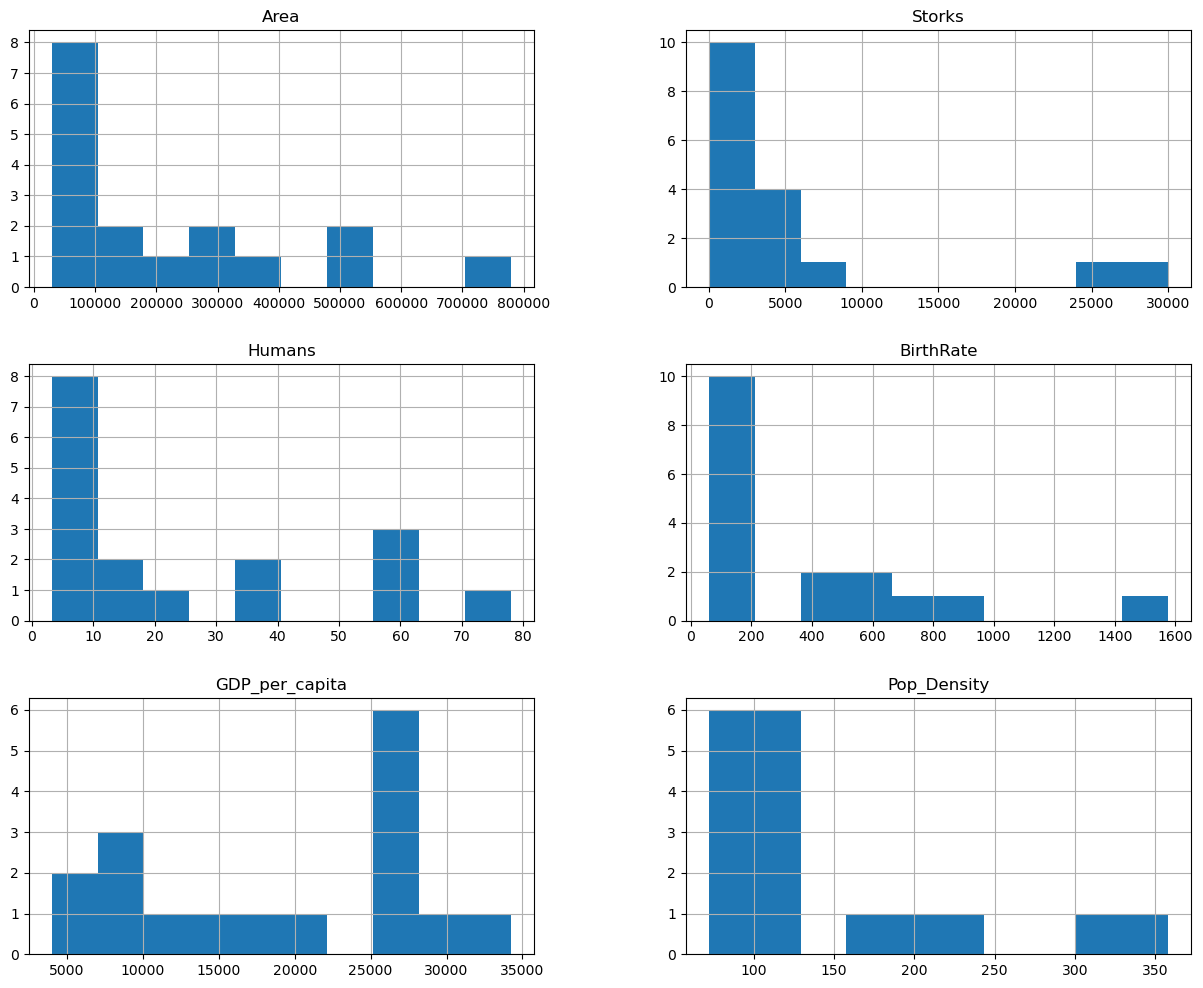

In [ ]:
data.hist(figsize=(15, 12))
plt.show()

As can be seen by both the histograms and the univariate summary statistics, none of the varaibles are unimodal or normally distributed. There is a heavy positive skew for all variables except `GPR per capita` which has a more negative skew to it. This is also seen in the summary statistics where the quartiles for each variable help to describe the skew of the distribution. There are gaps between the bins with a large spread of data for each variable shown through the standard deviation values. They all appear to have some form of outliers however as the dataset only has 17 countries, data is not excluded, as the dataset is too small to determine any form of outliers.

Correlational analysis between `Storks` and `BirthRate` was conducted in the original paper, which is an obvious nonsensical relationship, they do not cause each other and are indirectly correlated. Thus, before further analysis is run, a preliminary correlation coefficient between the continuous variables is conducted below. This is then graphically represented via a heatmap for more accessible interpretation.

In [ ]:
data.corr(numeric_only=True)

,Area,Storks,Humans,BirthRate,GDP_per_capita,Pop_Density
Area,1.000000,0.579342,0.812228,0.922544,-0.167741,-0.330140
Storks,0.579342,1.000000,0.354240,0.620265,-0.525765,-0.298310
Humans,0.812228,0.354240,1.000000,0.851209,0.069863,0.020191
BirthRate,0.922544,0.620265,0.851209,1.000000,-0.155945,-0.132259
GDP_per_capita,-0.167741,-0.525765,0.069863,-0.155945,1.000000,0.493016
Pop_Density,-0.330140,-0.298310,0.020191,-0.132259,0.493016,1.000000


The colour intensity displays which pair of numeric variables has the highest linear correlation with each other. The diagonals are 1, which is the variables correlation against itself.

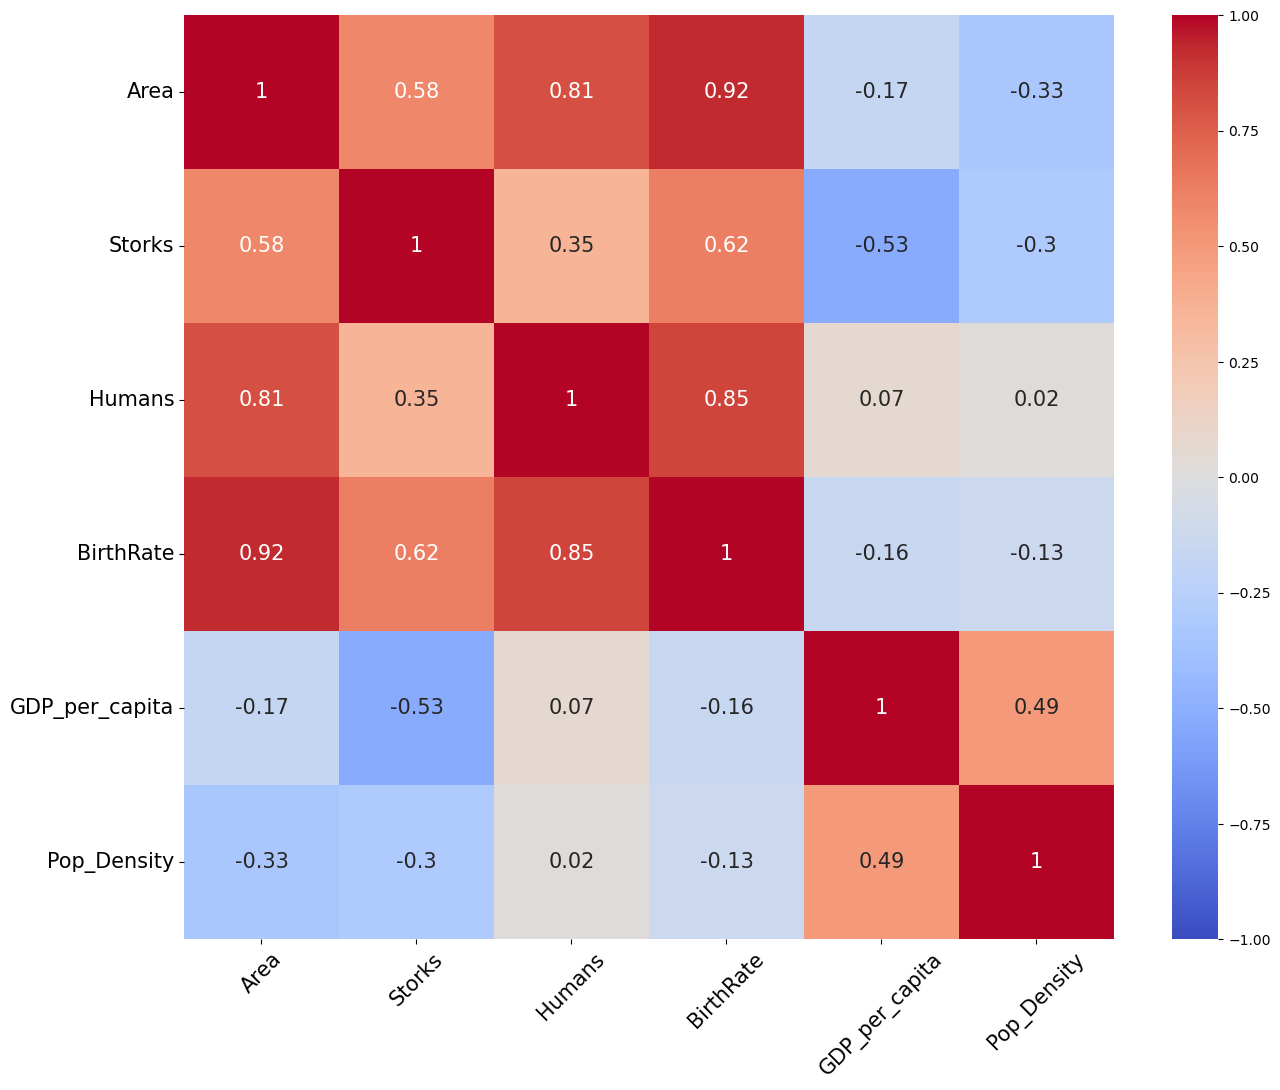

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(15,12))
sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm',
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize=15)

The largest correlational relationship between variables is between `Area` and `BirthRate` with a positive correlation of 0.92, with `Area` and `Humans` also having a large positive correlation of 0.81, which unlike `Storks` and `BirthRate` is plausible. `Humans` and `BirthRate` also have a strong positive correlation of 0.85. The largest negative relationship is determined to be between `GDP per capita` and `Storks` of -0.53, which would need to be explored further to come to a reasonable explaination as to why this has occured. The correlation between `GDP per capita` and `Humans` is negligeable with a small correlation of 0.02 as is the relationship between `GDP per capita` and `Humans`, which is not as understandable as `GDP per capita` is determined using population.

### Section 2: Variability of Birth Rates

This section uses the data loaded previously with regressional analyses to create models to determine what predictors are better at explaining the variability of the number of births.

#### 2.1: Does the Number of Storks explain the Birth Rate?

The first regression model created is given in the original paper, whereby Storks are used as a predictor for the variability of the birth rates. Using the dataset, the regression model is emulated below. 2.2 will compare this model against another. To be able to compare the regression model line against the data points, we plot the scattergraph of the Storks data and the Birth Rate below, before proceeding with the regression.

<Axes: xlabel='Storks', ylabel='BirthRate'>

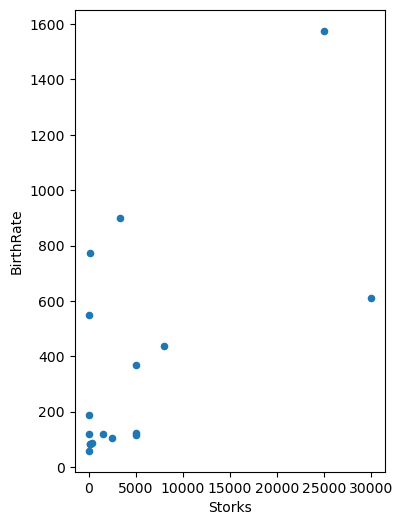

In [ ]:
data.plot(kind='scatter', x='Storks', y='BirthRate', figsize=(4,6))

In the original paper, the predictor variable listed is the Storks data with the target variable being Birth Rate as detailed below. The `X` variable is the predictor variable and `y` is the target variable.

In [ ]:
X = np.column_stack(data.Storks)  # Predictor variable
y = data.BirthRate  # Target variable

X = X.reshape(-1, 1) # Reshape X to a 2D array as theres only one variable

A linear regression is then run on the variables the same way it was in the paper, to determine the estimated regression coefficient between the variables in a null model. The R value as well as the $R^2$ value is printed. Where R represents the strength and direction of the linear relationship between two variables and $R^2$ measures the proportion of variance in the dependent variable explained by the independent variable in a regression model.

In [ ]:
reg= LinearRegression().fit(X,y)
print('The R2 coefficient of determination is %4.3f' % reg.score(X, y))
print('The R coefficient is %4.3f' % np.sqrt(reg.score(X, y)))
print('The intercept is %4.1f' % reg.intercept_)
beta_Storks =reg.coef_
print('Estimated regression coefficient for Stork Pairs is %4.2f' % beta_Storks,
      'influence on change to birth rate.')

The R2 coefficient of determination is 0.385
The R coefficient is 0.620
The intercept is 225.0
Estimated regression coefficient for Stork Pairs is 0.03 influence on change to birth rate.


As is seen in the paper by Matthews (2000), the printed values from the regression are the same here. The R value and thus the $R^2$ value have been replicated accurately as well as the intercept of the regression line. The $R^2$ value indicates that approximately 38.5% of variance in Birth Rate can be explained by Stork data: which is not especially high. The R value indicates the there appears to be a moderate linear relationship between the variables. The estimated regression coefficient indicates that for each unit increase in Storks, there is an estimated increase of 0.03 in Birth Rate. However, it is important to remember the original papers points: that it does not make practical sense for Storks to influence Birth Rate and is liekly affected by a confounder.

To emulate the paper for further accuracy the regression is plotted below with the addition of the equation of the regression line on the plot as was displayed in the original paper.

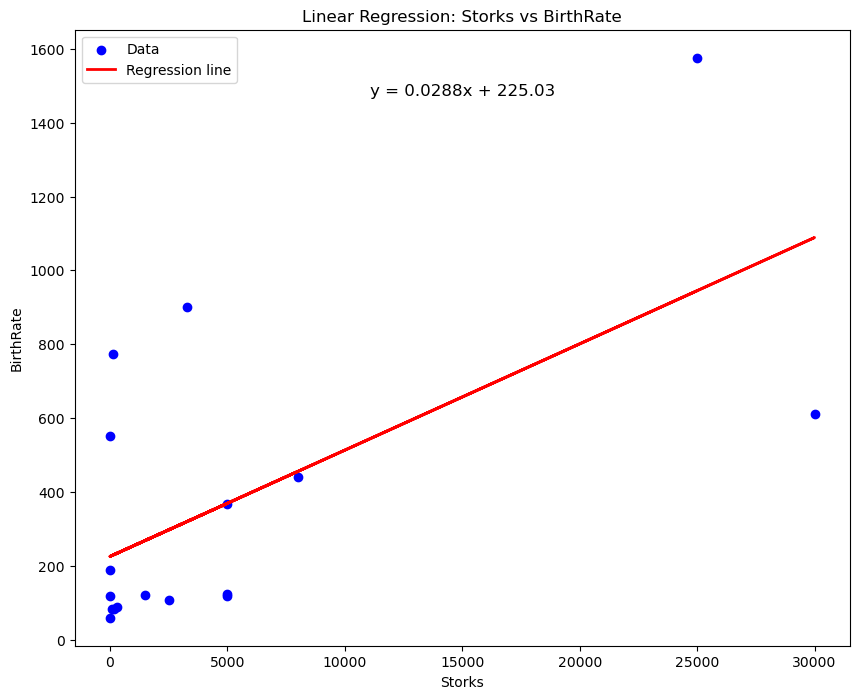

In [ ]:
y_pred = reg.predict(X) #predicted values of birth rate

# Extracting coefficients
slope = reg.coef_[0]
intercept = reg.intercept_

# Plot the regression line
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
# Print the equation of the regression line on the plot
plt.text(0.5, 0.9, f'y = {slope:.4f}x + {intercept:.2f}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)
plt.xlabel('Storks')
plt.ylabel('BirthRate')
plt.title('Linear Regression: Storks vs BirthRate')
plt.legend()
plt.show()

The graph replicates the original accurately with the same data points and the regression line having the exact same equation. The scatterplot of the data of Storks plotted against Birth Rate can be seen in the blue value points with the regression model line in the red line. The line does not appear to be very indicative of the data points.

Thus, as this is the first regression being used, the predicted values are used to calculate the errors for the model. The distribution of errors is plotted below in a histogram, which will be later compared to the other regression model of our own making.

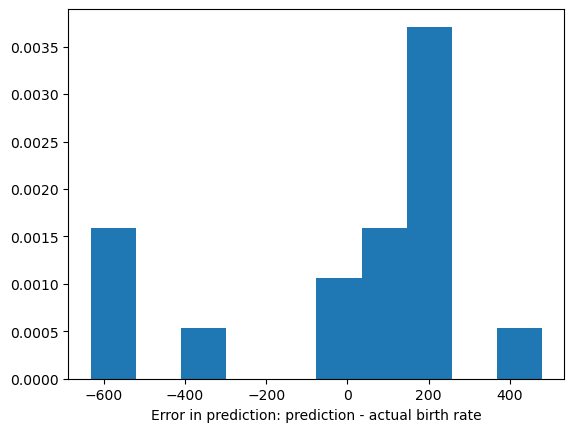

In [ ]:
fig,a1 = plt.subplots(1,1)
residuals = y_pred - y #errors
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: prediction - actual birth rate')

The root of the mean of the square of the errors is often used to compare different models, thus we will print it to be able to compare against the other model created later. In this case, the RMSE is 312.03 which implies that on average, this models predictions are 312.03 units off from actual Birth Rate.

In [ ]:
# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y, y_pred, squared=False))

Root of the mean squared error: 312.03


Although the coefficients show some positive relationship, the $R^2$ and RMSE values indicate confounders, or that other variables are more significant to Birth Rate (which is a reiteration of the points from the original paper).

#### 2.2: Do Multiple Predictors explain Birth Rate?

The regression model from the paper has now been recreated and briefly described and will be compared to another model with variables that logically make sense to influence Birth Rate. This regression model will use multiple predictor variables against the target variable to determine which model explains the variability of Birth Rate to a better degree. The new predictor variables used are: Population Size, GDP per Capita and Population Density. The idea behind these chosen predictors is that there are more births in a larger population; an increase in prosperity has been associated with reductions in family size and a crowded country may discourage large families. The regression model is created with the same metrics below and briefly explained and compared to the previous model and based on these ideas.

As with the previous regression model, the target variable is plotted against the selected predictor variables to determine that they are suitable for multiple regression, ie: there should be no signs of multicollinearity, are fairly normally distributed and to see a preliminary relationship between the predictor and target variables.

<Axes: xlabel='Pop_Density', ylabel='BirthRate'>

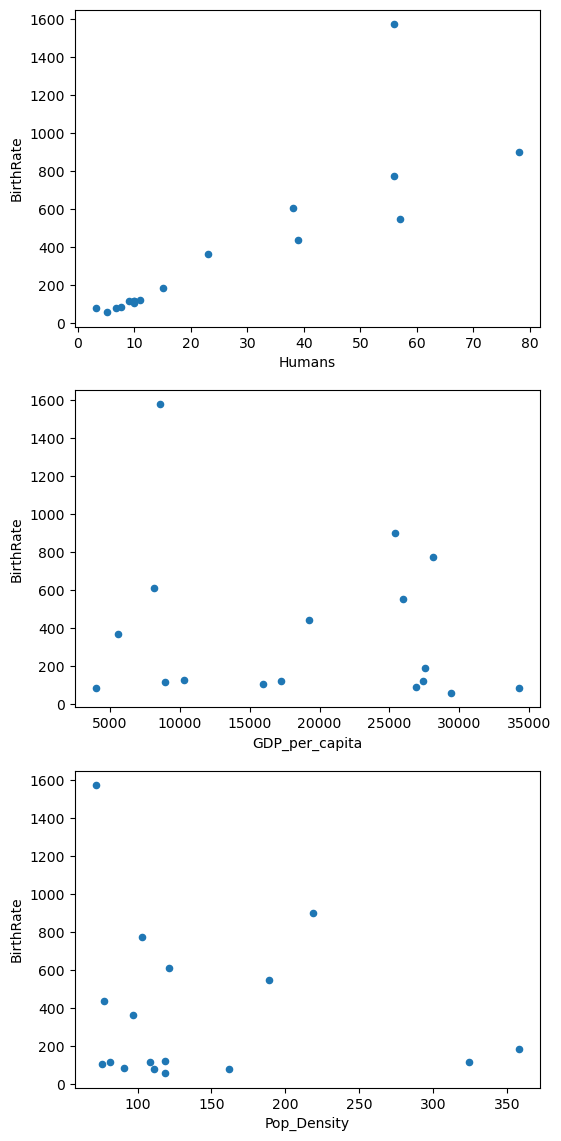

In [ ]:
fig, (a1,a2,a3) = plt.subplots(3, 1, figsize=(6,14))
data.plot(kind='scatter',  x='Humans', y='BirthRate', ax=a1)
data.plot(kind='scatter',  x='GDP_per_capita', y='BirthRate', ax=a2)
data.plot(kind='scatter',  x='Pop_Density', y='BirthRate', ax=a3)

As can be seen in the scatterplots, Population size (`Humans`) appears to have a positive linear relationship with Birth rate, seen by the plotting of the points in a line like shape. However, the varaibles Population Density and GDP do not appear to have an obvious relationship with birth rate. Although concerning, it is important to remember that there are only 17 values for each variable which could be considered too small a dataset to determine a relationship from. All predictor varaibles will continue to be included in the multiple regression.

The regression is conducted below. The X and y variables are defined first (they are labelled as `_2` to distinguish from the first model).

In [ ]:
X_2 = np.column_stack((data.Humans, data.GDP_per_capita, data.Pop_Density))
y_2 = data.BirthRate

The regression is run using all predictors with the same metrics printed for this model as were printed for the previous model with the addition of the regression coefficients for each predictor varaible. The metric values are briefly explained below.

In [ ]:
reg_2 = LinearRegression().fit(X_2, y_2)
print('The R2 coefficient of determination is %4.3f' % reg_2.score(X_2, y_2))
print('The R coefficient is %4.3f' % np.sqrt(reg_2.score(X_2, y_2)))
print('The intercept is %4.1f' % reg_2.intercept_)
beta_Humans, beta_GDP_per_capita, beta_Pop_Density =reg_2.coef_
print('Estimated regression coefficient for Humans is %4.2f' % beta_Humans,
      'influence on change to Birth Rate.')
print('Estimated regression coefficient for GDP per Capita is %4.2f' % beta_GDP_per_capita,
      'influence on change to Birth Rate.')
print('Estimated regression coefficient for Population Density is %4.2f' % beta_Pop_Density,
      'influence on change to Birth Rate.')

The R2 coefficient of determination is 0.774
The R coefficient is 0.880
The intercept is 173.9
Estimated regression coefficient for Humans is 15.08 influence on change to Birth Rate.
Estimated regression coefficient for GDP per Capita is -0.01 influence on change to Birth Rate.
Estimated regression coefficient for Population Density is -0.27 influence on change to Birth Rate.


The R value is higher than in Model 1, at 0.88 which signifies the strength and direction of the linear relationship between these variables and birth rate. A value closer to 1 indicates a stronger positive linear relationship, and this metric shows there is a strong correlation between variables. The $R^2$ value indicates that approximately 77.4% of variance in Birth Rate can be explained by the 3 predictor variables, which is a significant amount of variation explained. The largest estimated regression coefficient is Humans and Birthrate which indicates that for each unit increase in Population, there is an estimated increase of 15.08 in Birth Rate. As Population Density increases, Birth Rate decreases by 0.27 units. The coefficient of -0.01 suggests that, on average, for each unit increase in GDP, there is a small estimated decrease of 0.01 in Birth Rate. This indicates minimal influence.

These metrics suggest that there are more births in a larger population, which is line with what was suggested previously. However, these metrics do not indicate that an in increase in prosperity results in a reduction in birth rates and there is slight suggestions taht a crowded country may discourage families (minimal evidence).

In a multiple regression, it is especially important to explore the prediction and error distributions. Unlike the previous model, visualizing the entire model on a single plot is difficult as it involves multiple predictor variables. However, you can visualize the relationship between the predicted values and the actual values, which is a suitable metric to use to answer the question of how well the predictor variables can predict birth rate. The histogram of the errors is displayed below.

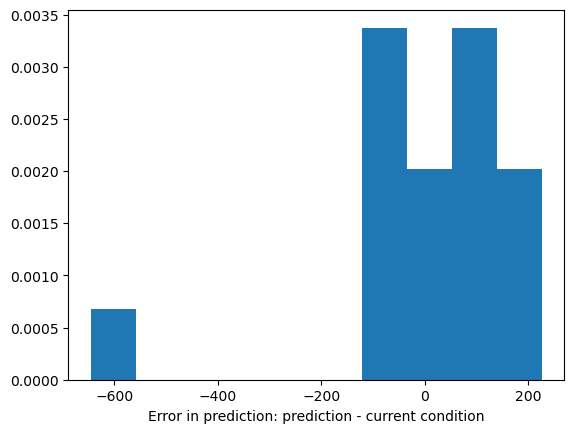

In [ ]:
y_2_pred = reg_2.predict(X_2)

fig,a1 = plt.subplots(1,1)
residuals = y_2_pred - y_2 #prediction errors
a1.hist(residuals, bins=10, density=True)
_ = a1.set_xlabel('Error in prediction: prediction - current condition')

The graph is different to Model 1's however, there still appears to be similar error levels above 0, whereas below -100 for Model 1 had more errors. As this is not as visually easy to compare a metric will be used to help compare the models. The RMSE measures the overall accuracy of the model as mentioned before and calculating it can determine a more suitable metric to compare with the previous model.

In [ ]:
# The mean squared error
print('Root of the mean squared error: %.2f'% mean_squared_error(y_2, y_2_pred, squared=False))

Root of the mean squared error: 189.27


The RMSE of Model 2 is 189.27 which indicates that the models predictions on average deviate from the actual values by 189.27 units. The RMSE of model 1 was 312.03, so Model 2 on average is 122.76 units more accurate than Model 1. This is indiciative that the model is a greater fit and more accurate in comparison, suggesting that the variables chosen compared to Storks are better at predicted Birth Rate on average.

A better way to visualise this is through a scatterplot that plots the predcited values from the model based on the predictor values against the actual values.

Text(0, 0.5, 'Actual Value')

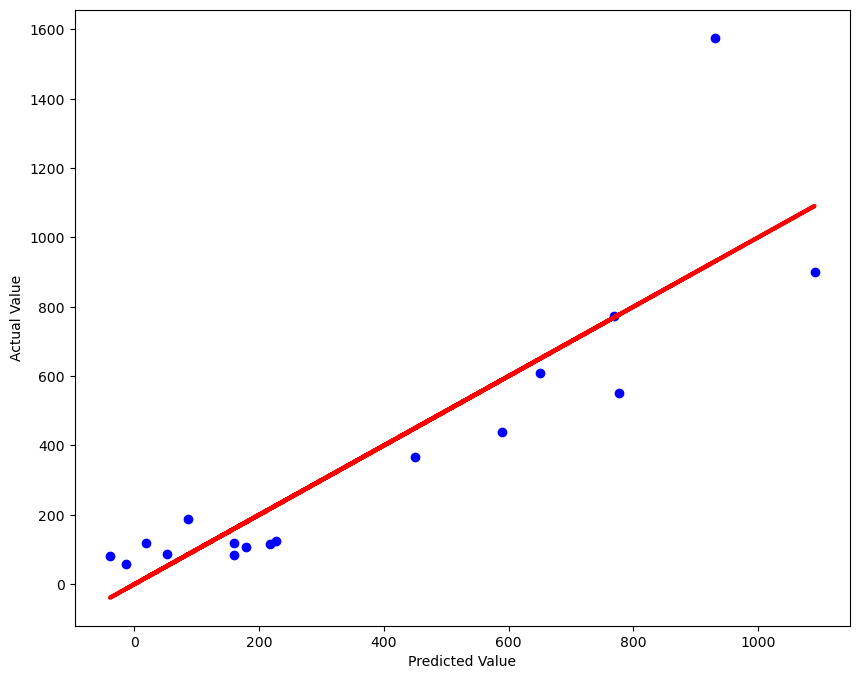

In [ ]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(10,8))
a.scatter(y_2_pred, y_2,  color='blue')
a.plot(y_2_pred, y_2_pred, color='red', linewidth=3)

#can remove the # before these to see the residuals as error bars between plot and expected
# two_std = residuals.std() * 2
# a.errorbar(y_2_pred, y_2, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

As shown by the RMSE, the difference is on average 189.27 units, so when a value is chosen it will differ by about 189.27 units on average. However, as can be seen for the lower values below 200 on the scatterplot, the predicted value is fairly similar to the actual value. However if a value is larger than 200 units than the difference between the predicted and actual value largely increases. This can also be seen in the histogram of errors where the majority of errors were above 200 units.

### Section 3: Estimating Confidence Intervals

This section will use the boostrapping technqiue to estimate confidence intervals for the data. Bootstrapping is used to draw additional samples from the original dataset and recalculate the model for each resample. An increase in samples allows for a more accurate confidence interval as it assesses the variability of a sample statistic. This section uses this technique to determine confidence intervals for predictor weights and for the difference in performance of the two models.

#### 3.1: Boostrap Regression Functions

In order to be able to estimate the confidence intervals, functions must be implemented to create a bootstrap distribution. Two function are created below: the first is a resampling function that takes repeated samples from the dataset. The second function creates the models made in Section 2, using a bootstrap sample; this is passed through the first function as that is what creates each resample.

In [ ]:
import scipy.stats as stats
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error

The function below is the first function that resamples the dataset used, and applies a function to the new dataframes to accumulate the results. The `data` is the sample which in this case is a dataframe, `cols` is the list of column headers in the results dataframe, `repeats` is the number of times the process is repeated and `func` will calculate the results for each sample and returns a value for every listed column.

In [ ]:
# Resampling Function:

def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = {c: np.empty(repeats) for c in cols})

    for i in range(repeats):
        resampled_data = resample(data)
        result.iloc[i] = func(resampled_data) # default is to resample, same size
    return result

As seen in Section 2, there are 2 models used. The first is from the original paper: a linear regression model between Storks and Birth Rate and the second modle is a multiple regression model between the selected predictors and Birth Rate. As there are 2 models, two functions are created that are each of the regression calculations. The first regression calculation function is created below.

In [ ]:
#Regression Model 1 Function
def doregression1(data):
    y= data['BirthRate'] #target variable
    X= data[['Storks']].values.reshape(-1, 1) #predictor variable
    reg = LinearRegression().fit(X, y)
    beta_Storks = reg.coef_[0] #multipliers
    y_pred = reg.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    return [reg.intercept_, beta_Storks, reg.score(X, y), rmse]

The second model with the multiple regression calculation is created in the function below.

In [ ]:
#Regression Model 2 Function
def doregression2(data):
    y= data['BirthRate'] #target variable
    X_2 = np.column_stack((data.Humans, data.GDP_per_capita, data.Pop_Density)) #predictor variable
    reg_2 = LinearRegression().fit(X_2, y)
    beta_Humans, beta_GDP_per_capita, beta_Pop_Density = reg_2.coef_ #multipliers
    y_2_pred = reg_2.predict(X_2)
    rmse = mean_squared_error(y_2, y_2_pred, squared=False)
    return [reg_2.intercept_, beta_Humans, beta_GDP_per_capita, beta_Pop_Density, reg_2.score(X_2, y), rmse]


#### 3.2: Estimating Confidence Intervals for Predictor Weights in Model 2
Now that the functions have been created, bootstrapping can be used to estimate confidence intervals. As we saw in the regression model in section 2, GDP and Population Density did not have as much of an impact as Population did. In order to evaluate the beta values (multipliers) for the predictors in Model 2, the bootstrapping function created is used to plot a distribution of the two beta values and estimate confidence intervals for them, to infer about the predictors.

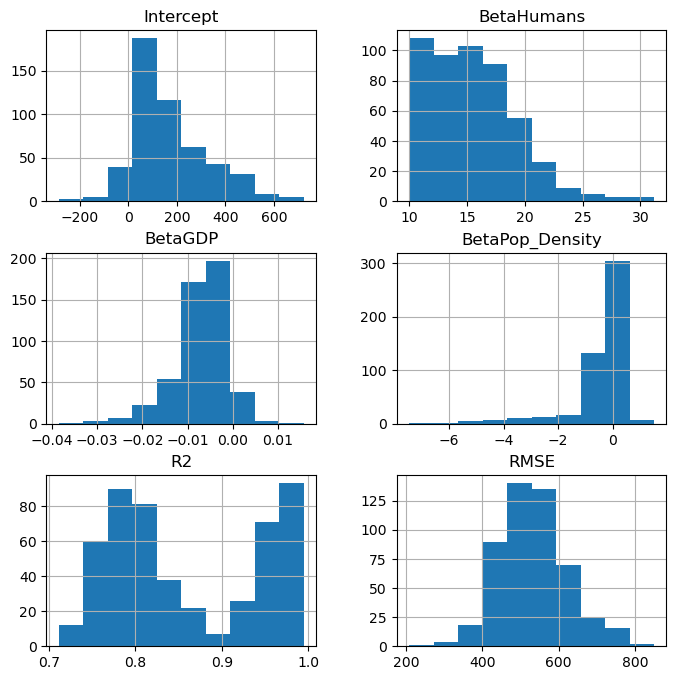

In [ ]:
columns2 = ['Intercept', 'BetaHumans', 'BetaGDP', 'BetaPop_Density', 'R2', 'RMSE']
n_bootstrap = 500

bstrap2 = bootstrapC(data, columns2, n_bootstrap, doregression2)
_ = bstrap2.hist(figsize=(8,8))

As the sample is small, the greater the uncertainty in the dataset. Confidence intervals are used to understand the potential error in a sample estimate. The bootstrap was done on Model 2 and the histograms above can be used to help determine what confidence level should be used. To account for the small sample size a larger interval allows for more confidence that the interval encloses the central % of the bootstrap sampling distribution of the beta values of the predictors. To allow for a higher confidence, a wider interval is used. However to ensure that the interval is not too wide as precision is also important, 90% alpha value allows for a broader range that allows for both certainty and also precision. The 90% confidence levels are determined for the GDP and Population density beta values for Model 2 below.

In [ ]:
intercept, betaHumans, betaGDP, betaPop_Density, r2, rmse = doregression2(data)

print("GDP coefficient is %3.2f, with 90%% CI from %3.2f to %3.2f" %
      (betaGDP, bstrap2.BetaGDP.quantile(0.05), bstrap2.BetaGDP.quantile(0.95)))

print("Population Density coefficient is %3.2f, with 90%% CI from %3.2f to %3.2f" %
      (betaPop_Density, bstrap2.BetaPop_Density.quantile(0.05), bstrap2.BetaPop_Density.quantile(0.95)))

GDP coefficient is -0.01, with 90% CI from -0.02 to 0.00
Population Density coefficient is -0.27, with 90% CI from -3.10 to 0.32


Based on these confidence interval for the GDP beta values, this shows that in the regression model 2, if the bootstrap sampling procedure is used many times, the true beta value for predictor GDP will be in the confidence interval 90% of the time. So there is a 90% confidence that the GDP beta value is likely to lie between -0.02 and 0. As the Confidence interval for GDP does contain 0 so that reinforces the idea that the effect of GDP on Birth Rate may not be statistically significant, as was mentioned in section 2. The estimated coefficient for Population Density beta values has a larger range of values compared to GDP, however this suggests uncertainty in the estimation. As it includees both positive and negative values within the confidence interval it is likely that the statistical significance mentioned in Section 2 is questionable, thus the impact is less clear on Birth Rate.

#### 3.3: Estimating Confidence Intervals for the Difference in Model Performance
Discussed in Section 2, was the RMSE, which is used across regression models to determine and compare models that may have a greater fit and be more accurate when comparing the predicted and actual values. The RMSE is an important metric so as done previously, bootstrap is used to estimate the confidence intervals for the difference in model performance. This is done by taking the RMSE calculated in Model 1 bootstraps and Model 2 bootstraps and finding the difference between them and the range of values that the RMSE falls in. This is done with a new function below and then visualised as a histogram to determine confidence intervals for the difference of performance of the two models. Then, the implications in relation to the paper are discussed briefly.

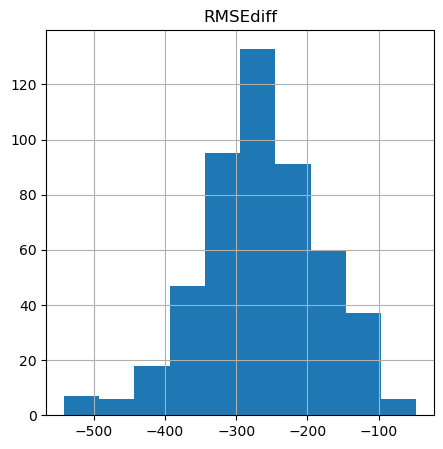

In [ ]:
def rmse_diff(doregression1, doregression2, data):
    rmse_model1 = doregression1(data)[-1]
    rmse_model2 = doregression2(data)[-1]
    return [rmse_model1 - rmse_model2]

columns_diff = ['RMSEdiff']
n_bootstrap = 500

bstrap = bootstrapC(data, columns_diff, n_bootstrap, lambda x: rmse_diff(doregression1, doregression2, x))
_ = bstrap.hist(figsize=(5,5))

As done before, the confidence intervals are estimated using the quantiles of the bootstrap distribution. The difference in RMSE's is an important metric so it is important that precision and uncertainty are taken into consideration when choosing confidence intervals. As a result, the alpha values below are 3: 90%, 95% and 99% to determine the most appropriate confidence intervals and come to the most conclusive decision.

In [ ]:
sampleDiff = rmse_diff(doregression1, doregression2, data)[0]
print("The difference between the models RMSE (model 1 - model 2) is %3.2f with 90%% CI %3.2f to %3.2f" %
      (sampleDiff, bstrap.RMSEdiff.quantile(0.05), bstrap.RMSEdiff.quantile(0.95)))
print("The difference between the models RMSE (model 1 - model 2) is %3.2f with 95%% CI %3.2f to %3.2f" %
      (sampleDiff, bstrap.RMSEdiff.quantile(0.025), bstrap.RMSEdiff.quantile(0.975)))
print("The difference between the models RMSE (model 1 - model 2) is %3.2f with 99%% CI %3.2f to %3.2f" %
      (sampleDiff, bstrap.RMSEdiff.quantile(0.005), bstrap.RMSEdiff.quantile(0.995)))

The difference between the models RMSE (model 1 - model 2) is 122.77 with 90% CI -404.51 to -125.99
The difference between the models RMSE (model 1 - model 2) is 122.77 with 95% CI -443.43 to -107.05
The difference between the models RMSE (model 1 - model 2) is 122.77 with 99% CI -525.70 to -75.63


The 90% confidence interval suggests that there is 90% confidence that the true RMSE difference between models lies within the stated negative values. As the confidence level increases the range of values increases also and in order to ensure a higher confidence level with only a slightly wider range, 95% would be considered the most appropriate confidence interval. As all confidence intervals show here, there is a constant negative value suggesting that with a high level of confudence Model 2 has a lower RMSE compared to Model 1. Thus, Model 2 is expected to perform better in predicting Birth Rate compared to Model 1, based on the given data.

When taking into account the context of the data and in relation to the paper, there is a high level of confidence that Model 1 predicts the number of Storks better than Model 2, considering the consistently negative RMSE difference across the confidence intervals. As 0 is not present in any of these range of values, it suggests also that the RMSE difference is significant, allowing for confidence in the inference that Model 1 is significantly lower than Model 2 and thus predicts the number of storks better.

#### 3.4: Overall Conclusions

It is claimed that the data analysis shows that storks do not deliver babies. The data overall does show inclination towards agreeing with this claim. In Section 2, in the comparisons of the regression models, it can be seen that the combination of the Model 2 predictors are significantly more accurate in predicting the Birth Rate compared to Storks in Model 1. This is perpetuated in Section 3, where the use of bootstrap to determine confidence intervals and thus draw conclusions shows similar inference. It can be seen that the Population (variable `Humans`) in Model 2 is the most statistically significant and accurate at predicting the Birth Rate, with little impact from the other 2 predictor variables. Bootstrap shows that `Population Desnity` needs to be explored more due to the uncertainty in the estimations. The bootstrap analysis helps to quantify the uncertainty around the coefficients and the difference between RMSE values between models. For Model 2 the confidence intervals do not include 0 suggesting that they have a significant impact on birth rates. The difference in RMSE confidence intervals is very important in answering the claim made. The lower RMSE for Model 2 compared to Model 1 suggests that the difference is significant and that Model 2 predicts Birth Rates more accurately than Model 1.

The data analysis shows that other variables are better at explaining the variation in Birth Rates and more significantly influences Birth Rates in comparison to Storks. It however, does not confirm or deny the statment 'Storks do not deliver babies' as causation can not be established based on the data analysis conducted. So while we can logically suggest that storks do not deliver babies, much like the paper mentions, the data analysis conducted is not intuitive enough to draw conclusions that this is impossible. Neither regression model supports or disproves this claim that storks deliver babies, as they analyse correlation. Causation needs to be determined, as correlation is not indicative of causation. So, while logically the claim storks do not deliver babies makes sense, this has not been shown by the data analysis that storks do or do not deliver babies.